# 案例
## 1.自回归


In [15]:
import time
import os
import pandas as pd

filename = "pm2.5_xuzhou2022.csv"
df=pd.read_csv(filename,names=['date','quality','AQI','ranking','PM2.5(μg/m3)','Pm10(μg/m3)','So2(μg/m3)','No2(μg/m3)','Co(mg/m3)','O3(μg/m3)'])
df

,date,quality,AQI,ranking,PM2.5(μg/m3),Pm10(μg/m3),So2(μg/m3),No2(μg/m3),Co(mg/m3),O3(μg/m3)
0,2022-08-01,优,40,167,20,40,6,17,0.50,76
1,2022-08-02,优,46,212,23,43,6,17,0.50,85
2,2022-08-03,良,59,304,32,55,7,16,0.55,116
3,2022-08-04,良,58,316,31,54,6,15,0.54,121
4,2022-08-05,良,51,296,28,52,6,16,0.57,117
...,...,...,...,...,...,...,...,...,...,...
29,2013-11-30,轻度污染,101,69,102,175,91,67,1.67,20
0,2013-10-28,轻度污染,117,43,87,131,51,67,1.54,69
1,2013-10-29,中度污染,164,79,125,188,96,93,2.53,53
2,2013-10-30,良,63,23,38,74,73,56,1.51,24


In [7]:
#把时间字符串转为索引
df['time_index']=pd.to_datetime(df['date'])
df.set_index('time_index',inplace=True)
df

,date,quality,AQI,ranking,PM2.5(μg/m3),Pm10(μg/m3),So2(μg/m3),No2(μg/m3),Co(mg/m3),O3(μg/m3)
time_index,,,,,,,,,,
2022-08-01,2022-08-01,优,40,167,20,40,6,17,0.50,76
2022-08-02,2022-08-02,优,46,212,23,43,6,17,0.50,85
2022-08-03,2022-08-03,良,59,304,32,55,7,16,0.55,116
2022-08-04,2022-08-04,良,58,316,31,54,6,15,0.54,121
2022-08-05,2022-08-05,良,51,296,28,52,6,16,0.57,117
...,...,...,...,...,...,...,...,...,...,...
2013-11-30,2013-11-30,轻度污染,101,69,102,175,91,67,1.67,20
2013-10-28,2013-10-28,轻度污染,117,43,87,131,51,67,1.54,69
2013-10-29,2013-10-29,中度污染,164,79,125,188,96,93,2.53,53


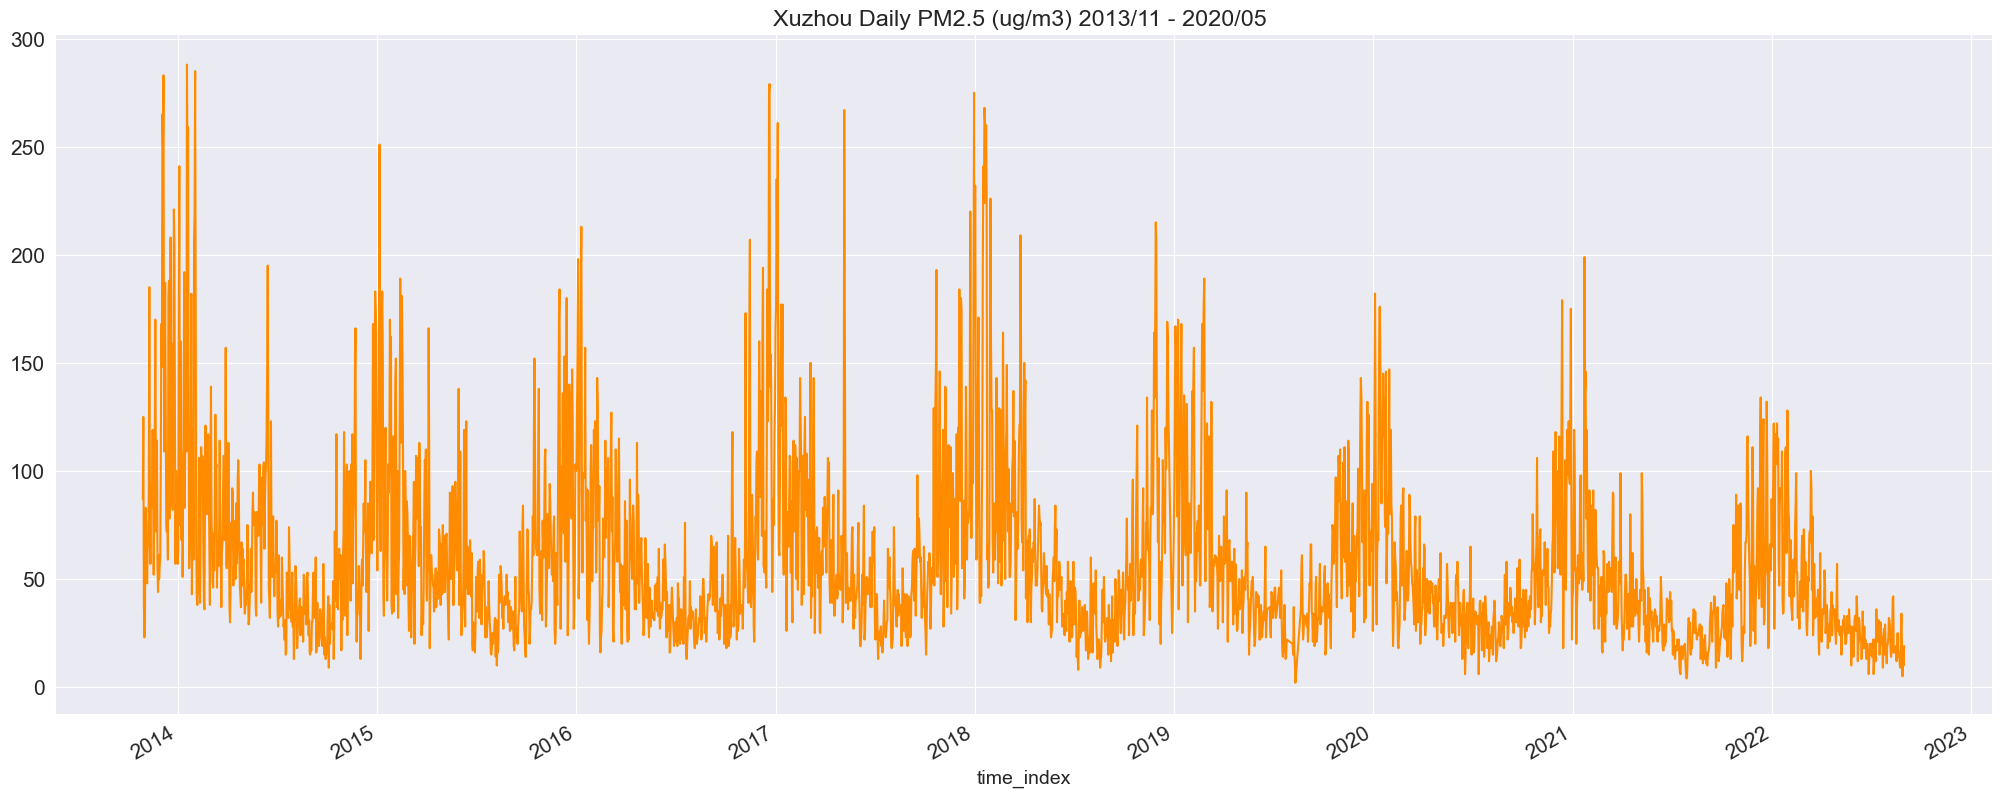

In [8]:
#将每日数据绘制成折线图
plot=df['PM2.5(μg/m3)'].plot(figsize=(25,10),title="Xuzhou Daily PM2.5 (ug/m3) 2013/11 - 2020/05 ",color='darkorange', grid=True,fontsize=15)
fig=plot.get_figure()
fig.savefig("Xuzhou Daily PM2.5.png")

d:\big_data_test\envi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\big_data_test\envi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


time_index
2022-08-01     20
2022-08-02     23
2022-08-03     32
2022-08-04     31
2022-08-05     28
             ... 
2013-11-30    102
2013-10-28     87
2013-10-29    125
2013-10-30     38
2013-10-31     23
Name: PM2.5(μg/m3), Length: 3185, dtype: int64
                            AutoReg Model Results                             
Dep. Variable:           PM2.5(μg/m3)   No. Observations:                 3185
Model:                     AutoReg(3)   Log Likelihood              -15132.725
Method:               Conditional MLE   S.D. of innovations             28.129
Date:                Wed, 23 Nov 2022   AIC                          30275.450
Time:                        20:12:06   BIC                          30305.776
Sample:                             3   HQIC                         30286.325
                                 3185                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

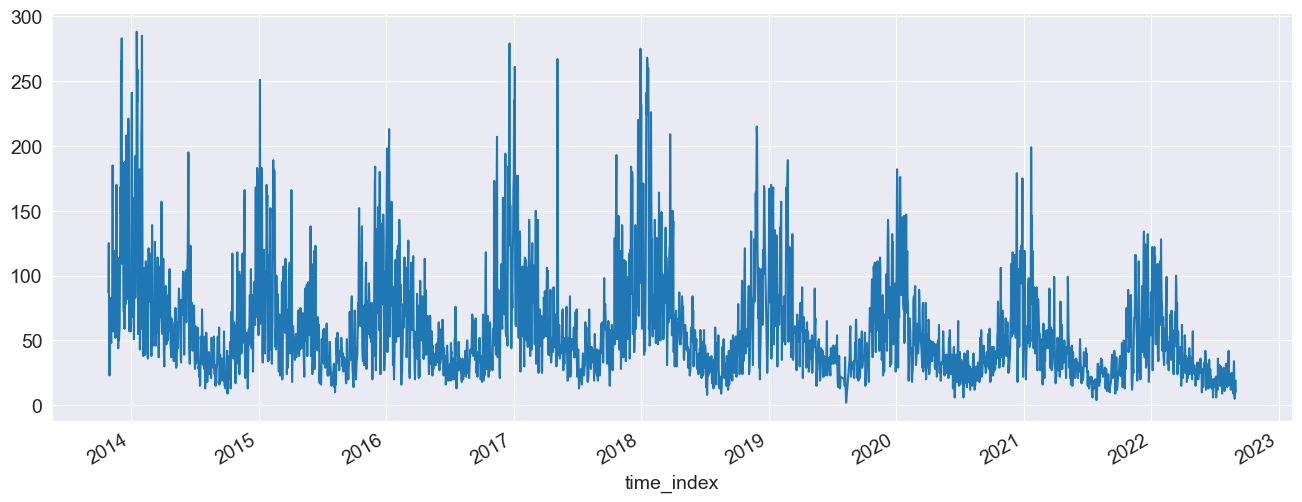

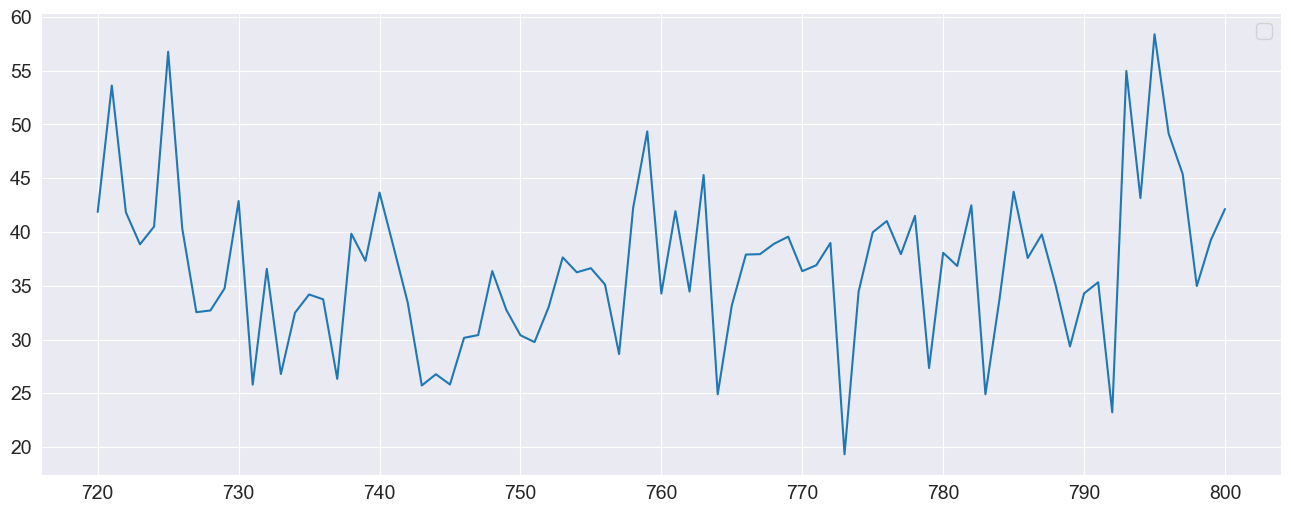

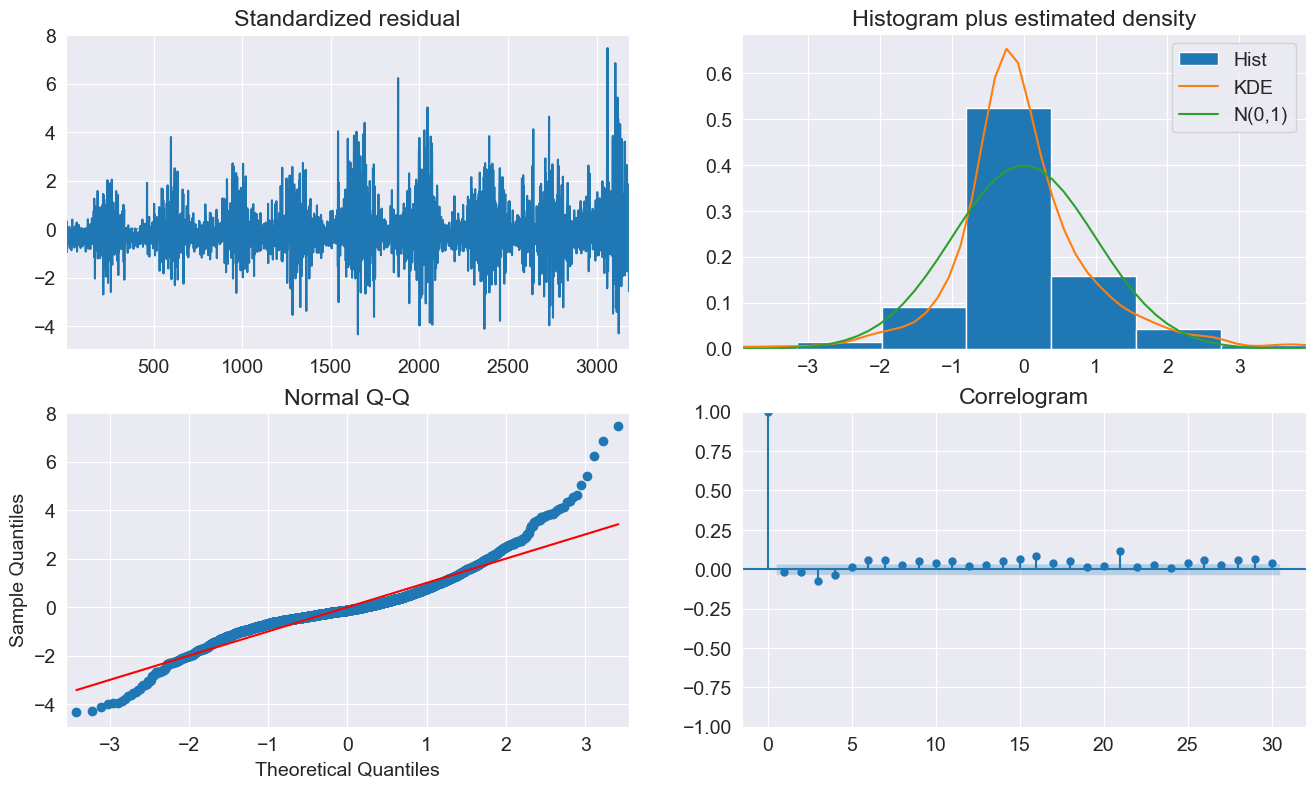

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

data = pdr.get_data_fred("HOUSTNSA", "1959-01-01", "2019-06-01")
data = df['PM2.5(μg/m3)']
print(data)
PM25 = data.dropna()
# Scale by 100 to get percentages
# housing = 100 * housing.asfreq("MS")
fig, ax = plt.subplots()
assert isinstance(ax, object)
ax = PM25.plot(ax=ax)

mod = AutoReg(PM25, 3, old_names=False)
res = mod.fit()
print(res.summary())

fig = res.plot_predict(720, 800)

fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

plt.show()


C:\Users\xyt556\AppData\Local\Temp\4\ipykernel_28044\1208694311.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1=df.resample('M').mean()     #月份采样，取月平均值


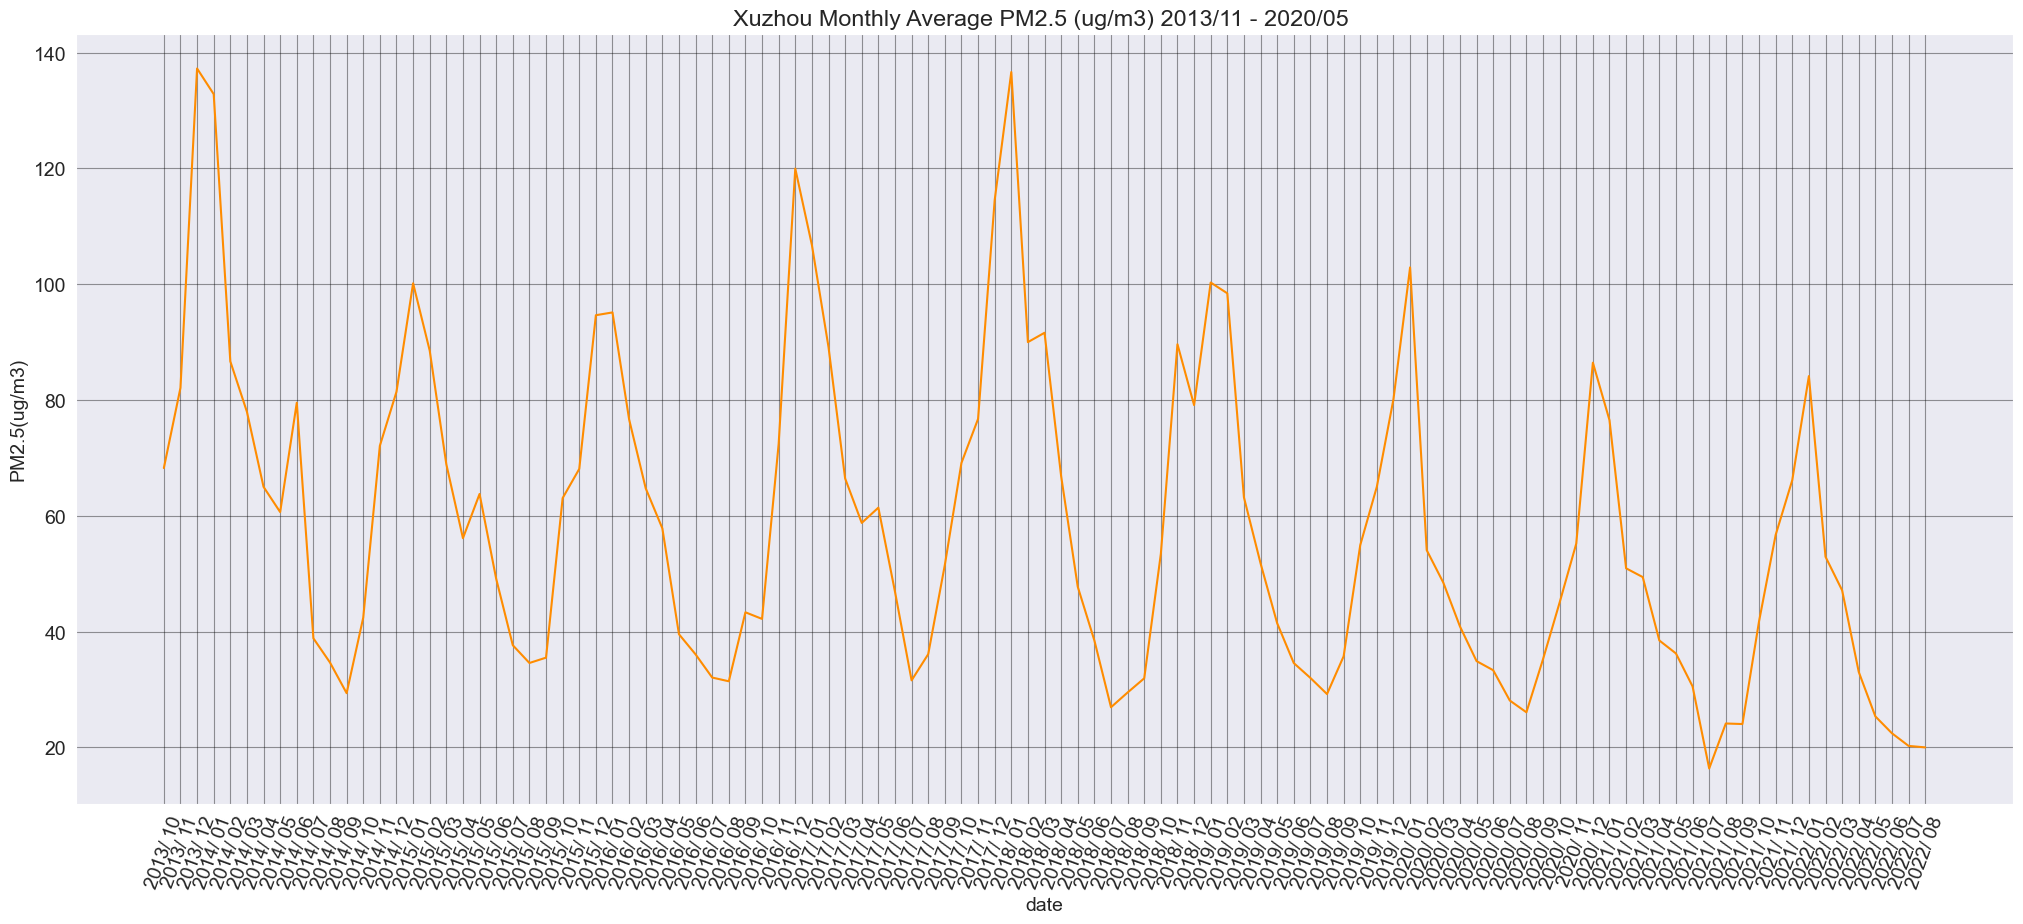

In [9]:
import matplotlib.pyplot as plt

#降低数据采样频率
df1=df.resample('M').mean()     #月份采样，取月平均值

#绘制折线图：
plt.figure(figsize=(25,10))
data=df1['PM2.5(μg/m3)']
#print(data.index)
#print(data.values)

_x=data.index
_y=data.values
_x = [i.strftime("%Y/ %m") for i in _x]
plt.plot(range(len(_x)), _y,'darkorange')
plt.xticks(range(len(_x)), _x, rotation=70)
plt.grid(color='black', linestyle='-', linewidth=0.8,alpha=0.4)
plt.xlabel('date')
plt.ylabel('PM2.5(ug/m3)')
plt.title('Xuzhou Monthly Average PM2.5 (ug/m3) 2013/11 - 2020/05 ')
plt.savefig('Xuzhou Monthly Average PM2.5.png')
plt.show()

            HOUSTNSA
DATE                
1959-01-01      96.2
1959-02-01      99.0
1959-03-01     127.7
1959-04-01     150.8
1959-05-01     152.5
...              ...
2019-02-01      80.0
2019-03-01      98.2
2019-04-01     116.6
2019-05-01     118.1
2019-06-01     115.1

[726 rows x 1 columns]
                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Wed, 23 Nov 2022   AIC                           5996.884
Time:                        19:51:04   BIC                           6019.794
Sample:                    05-01-1959   HQIC                          6005.727
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025    

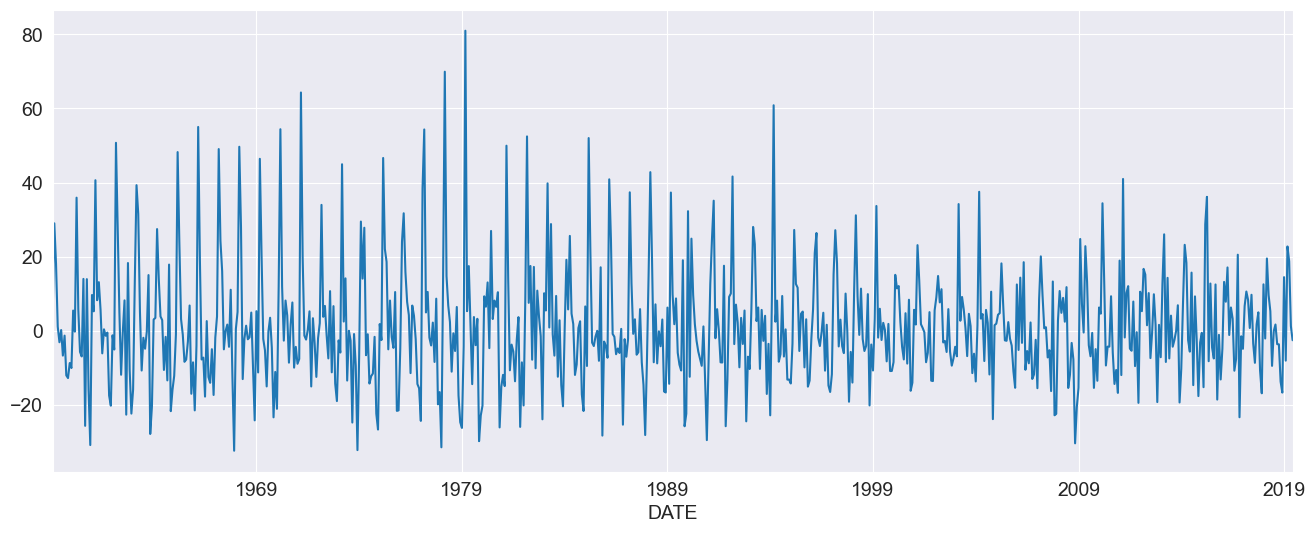

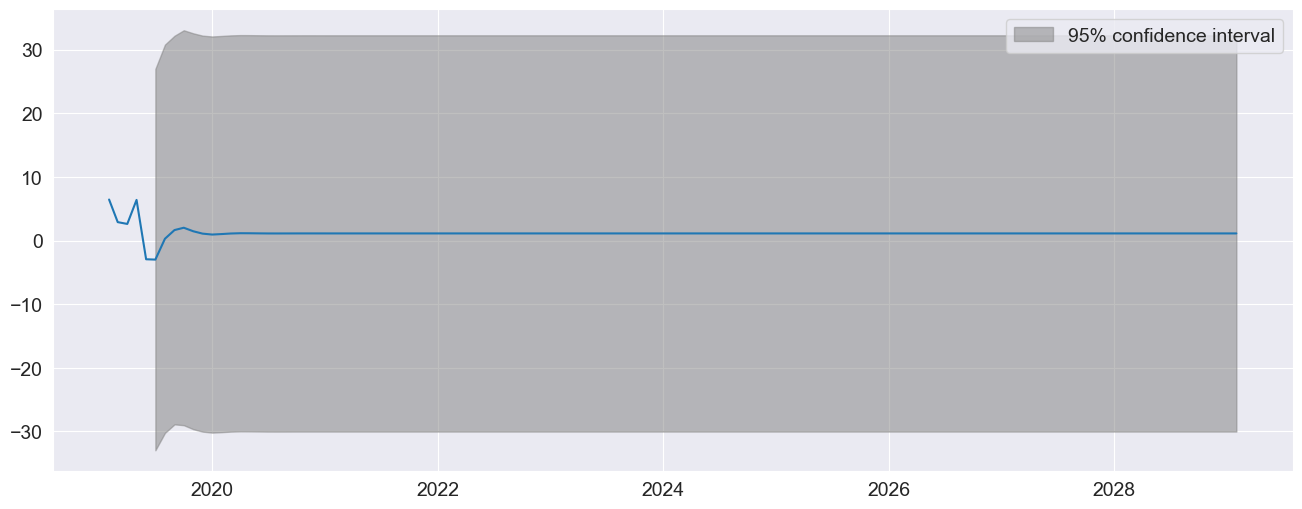

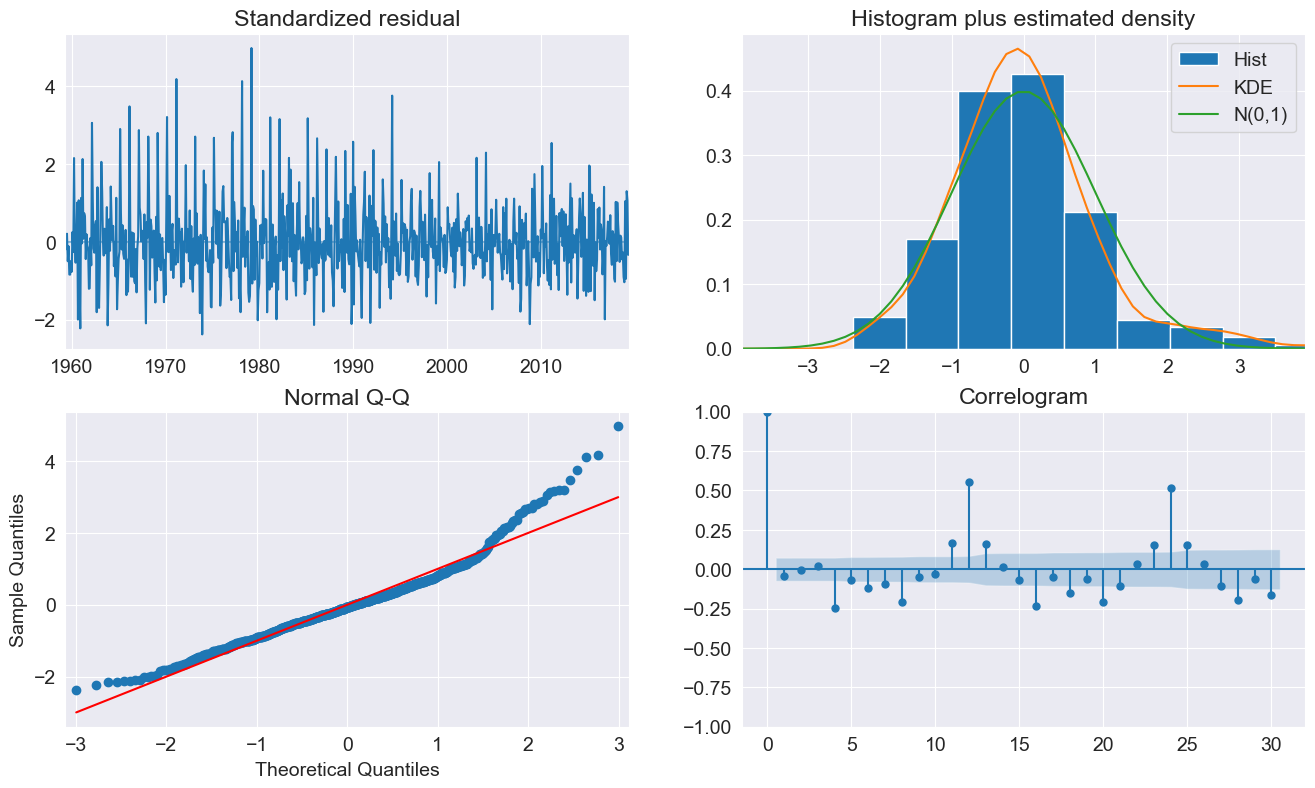

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

data = pdr.get_data_fred("HOUSTNSA", "1959-01-01", "2019-06-01")

print(data)
housing = data.HOUSTNSA.pct_change().dropna()
# Scale by 100 to get percentages
housing = 100 * housing.asfreq("MS")
fig, ax = plt.subplots()
assert isinstance(ax, object)
ax = housing.plot(ax=ax)

mod = AutoReg(housing, 3, old_names=False)
res = mod.fit()
print(res.summary())

fig = res.plot_predict(720, 840)

fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

plt.show()


## 2.季节动态

                               AutoReg Model Results                                
Dep. Variable:                     HOUSTNSA   No. Observations:                  714
Model:             Restr. Seas. AutoReg(13)   Log Likelihood                 590.875
Method:                     Conditional MLE   S.D. of innovations              0.104
Date:                      Wed, 23 Nov 2022   AIC                          -1143.751
Time:                              19:32:30   BIC                          -1057.253
Sample:                          02-01-1961   HQIC                         -1110.317
                               - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0167      0.014      1.215      0.224      -0.010       0.044
s(2,12)         -0.0179      0.019     -0.931      0.352      -0.056       0.

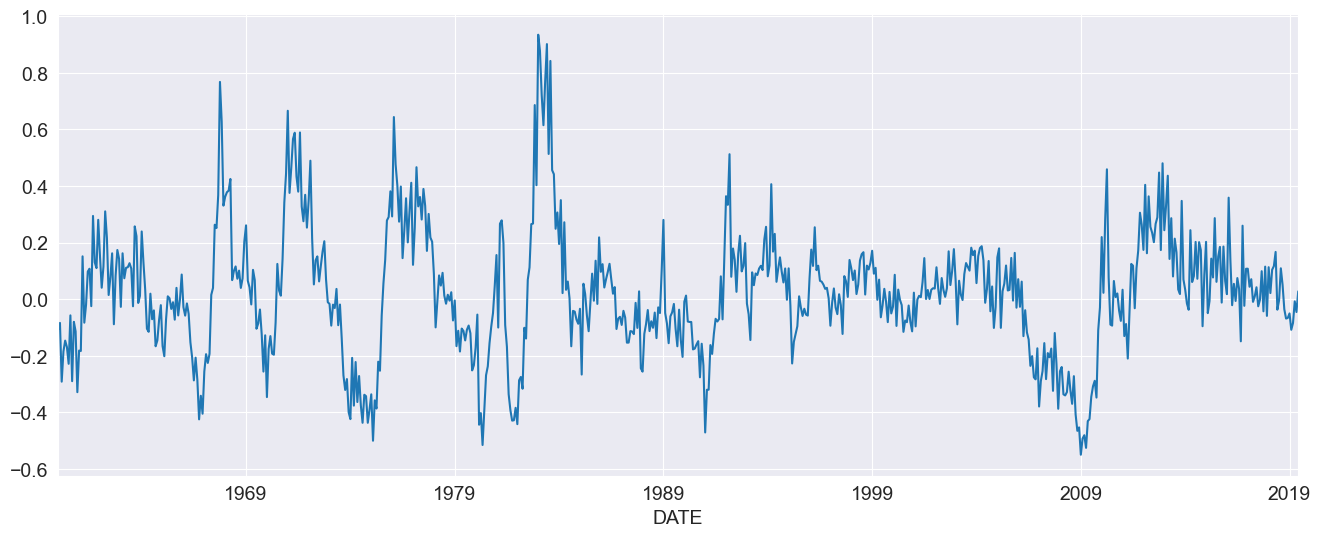

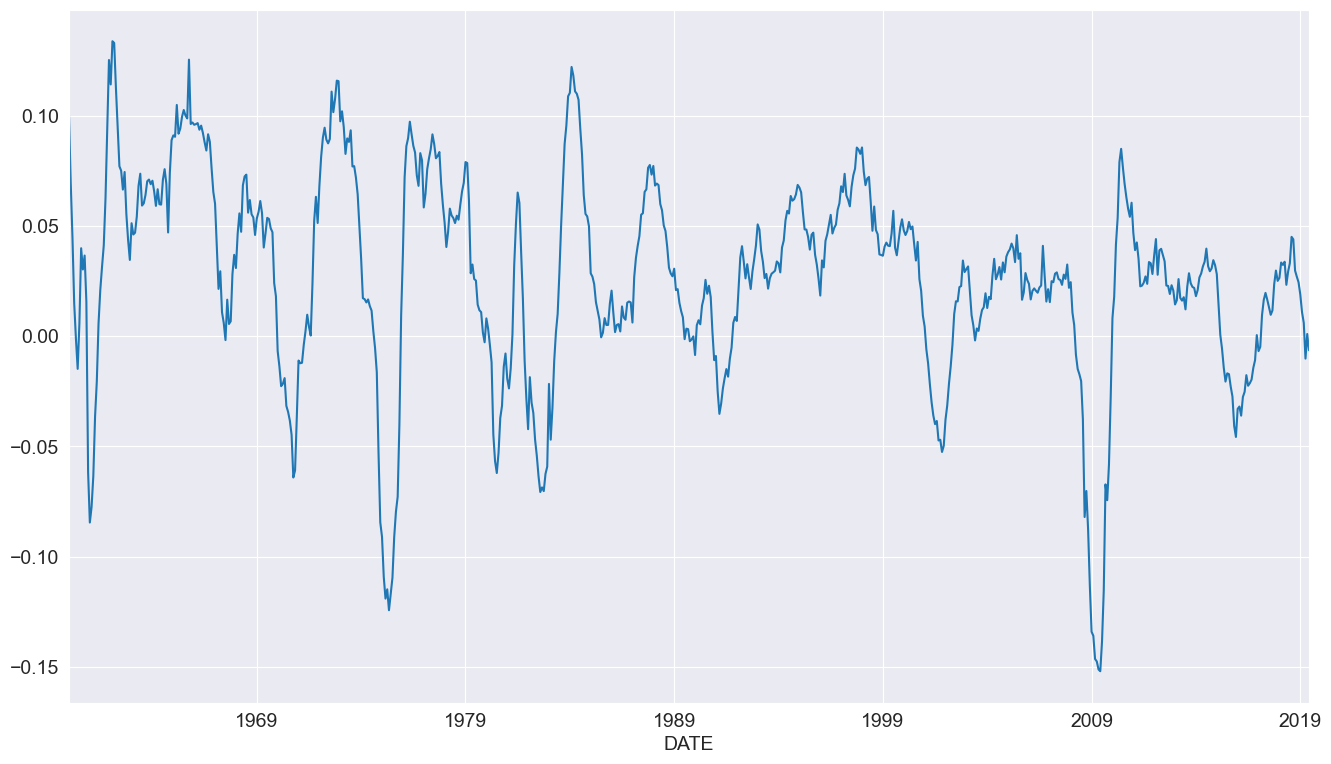

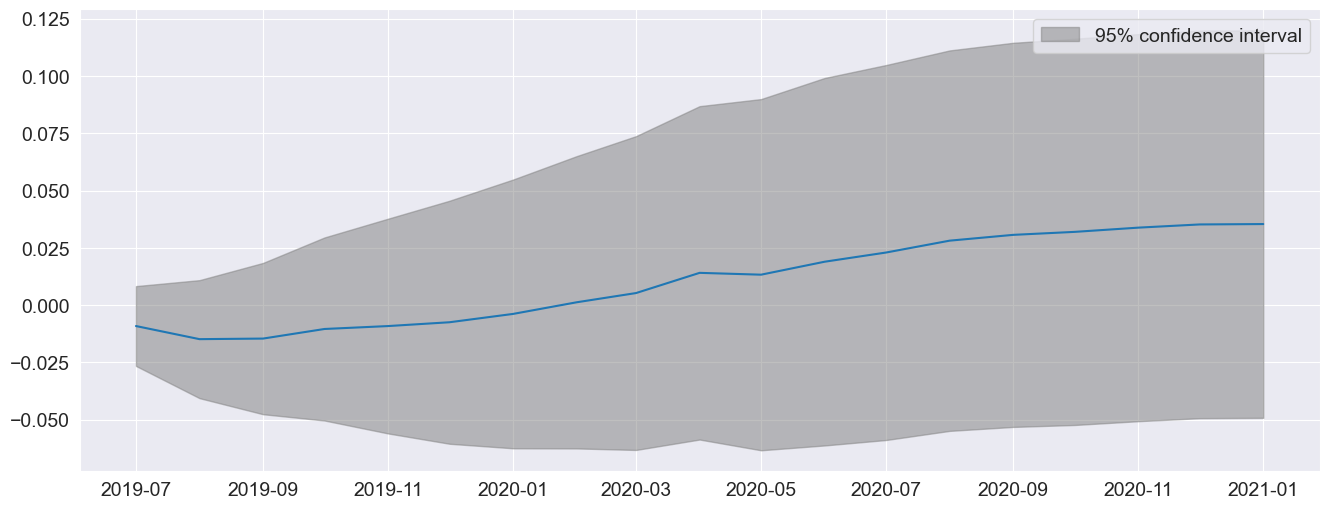

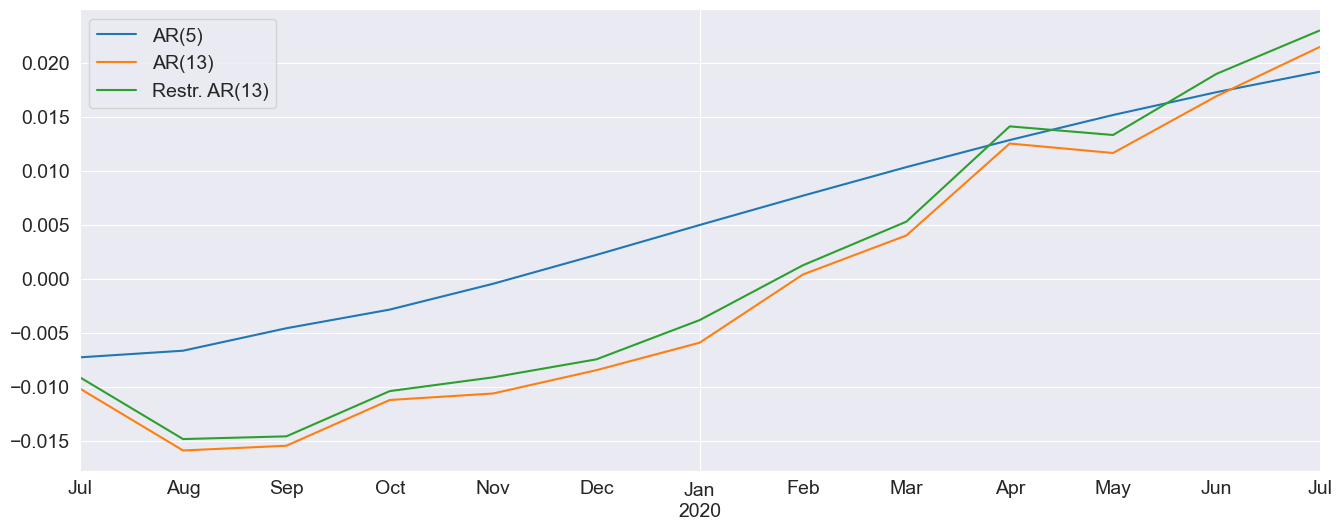

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

data = pdr.get_data_fred("HOUSTNSA", "1959-01-01", "2019-06-01")

yoy_housing = data.HOUSTNSA.pct_change(12).resample("MS").last().dropna()
_, ax = plt.subplots()
ax = yoy_housing.plot(ax=ax)

sel = ar_select_order(yoy_housing, 13, old_names=False)
sel.ar_lags


sel = ar_select_order(yoy_housing, 13, glob=True, seasonal=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

data = pdr.get_data_fred("INDPRO", "1959-01-01", "2019-06-01")
ind_prod = data.INDPRO.pct_change(12).dropna().asfreq("MS")
_, ax = plt.subplots(figsize=(16, 9))
ind_prod.plot(ax=ax)

sel = ar_select_order(ind_prod, 13, "bic", old_names=False)
res = sel.model.fit()
print(res.summary())


sel = ar_select_order(ind_prod, 13, "bic", glob=True, old_names=False)
sel.ar_lags
res_glob = sel.model.fit()
print(res.summary())

ind_prod.shape



fig = res_glob.plot_predict(start=714, end=732)

res_ar5 = AutoReg(ind_prod, 5, old_names=False).fit()
predictions = pd.DataFrame(
    {
        "AR(5)": res_ar5.predict(start=714, end=726),
        "AR(13)": res.predict(start=714, end=726),
        "Restr. AR(13)": res_glob.predict(start=714, end=726),
    }
)
_, ax = plt.subplots()
ax = predictions.plot(ax=ax)

plt.show()


# 案例3 课余

In [13]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy.linalg as la
import math
# from statsmodels.tsa.arima_model import ARIMA
import time
import statsmodels.api as sm

def preprocess_data(data, time_len, rate, seq_len, pre_len):
    data1 = np.mat(data)
    train_size = int(time_len * rate)
    train_data = data1[0:train_size]
    test_data = data1[train_size:time_len]

    trainX, trainY, testX, testY = [], [], [], []
    for i in range(len(train_data) - seq_len - pre_len):
        a = train_data[i: i + seq_len + pre_len]
        trainX.append(a[0: seq_len])
        trainY.append(a[seq_len: seq_len + pre_len])
    for i in range(len(test_data) - seq_len - pre_len):
        b = test_data[i: i + seq_len + pre_len]
        testX.append(b[0: seq_len])
        testY.append(b[seq_len: seq_len + pre_len])
    return trainX, trainY, testX, testY


###### evaluation ######
def evaluation(a, b):
    rmse = math.sqrt(mean_squared_error(a, b))
    mae = mean_absolute_error(a, b)
    F_norm = la.norm(a - b) / la.norm(a)
    r2 = 1 - ((a - b) ** 2).sum() / ((a - a.mean()) ** 2).sum()
    var = 1 - (np.var(a - b)) / np.var(a)
    return rmse, mae, 1 - F_norm, r2, var


time_start = time.time()
path = r'./432_1800_cql_00001.csv'
data = pd.read_csv(path,encoding='utf-8')

time_len = data.shape[0]
num_nodes = data.shape[1]
train_rate = 0.8
seq_len = 7
pre_len = 1
trainX, trainY, testX, testY = preprocess_data(data, time_len, train_rate, seq_len, pre_len)
method = 'ARIMA'  ####HA or SVR or ARIMA

######## ARIMA #########
if method == 'ARIMA':
    rng = pd.date_range('1/3/2012', periods=1379, freq='D')
    a1 = pd.DatetimeIndex(rng)
    data.index = a1
    num = data.shape[1]
    rmse, mae, acc, r2, var, pred, ori = [], [], [], [], [], [], []
    for i in range(3):
        ts = data.iloc[:, i]
        ts_log = np.log(ts)
        ts_log = ts
        ts_log = np.array(ts_log, dtype=np.float)
        where_are_inf = np.isinf(ts_log)
        ts_log[where_are_inf] = 0
        ts_log = pd.Series(ts_log)
        ts_log.index = a1
        model = sm.tsa.arima.ARIMA(ts_log, order=(1, 1, 1))
        # model = ARIMA(ts_log, order=[1, 0, 0])
        properModel = model.fit()
        predict_ts = properModel.predict(4, dynamic=True)
        log_recover = np.exp(predict_ts)
        log_recover = predict_ts
        ts = ts[log_recover.index]
        path = './output/'
        name = 'logrecover_' + str(i) + '.csv'
        logrecover = pd.DataFrame(log_recover)
        logrecover.to_csv(path + name)
        er_rmse, er_mae, er_acc, r2_score, var_score = evaluation(ts, log_recover)
        rmse.append(er_rmse)
        mae.append(er_mae)
        acc.append(er_acc)
        r2.append(r2_score)
        var.append(var_score)
    #    for i in range(109,num):
    #        ts = data.iloc[:,i]
    #        ts_log=np.log(ts)
    #        ts_log=np.array(ts_log,dtype=np.float)
    #        where_are_inf = np.isinf(ts_log)
    #        ts_log[where_are_inf] = 0
    #        ts_log = pd.Series(ts_log)
    #        ts_log.index = a1
    #        model = ARIMA(ts_log,order=[1,1,1])
    #        properModel = model.fit(disp=-1, method='css')
    #        predict_ts = properModel.predict(2, dynamic=True)
    #        log_recover = np.exp(predict_ts)
    #        ts = ts[log_recover.index]
    #        er_rmse,er_mae,er_acc,r2_score,var_score = evaluation(ts,log_recover)
    #        rmse.append(er_rmse)
    #        mae.append(er_mae)
    #        acc.append(er_acc)
    #        r2.append(r2_score)
    #        var.append(var_score)
    acc1 = np.mat(acc)
    acc1[acc1 < 0] = 0
    print('arima_rmse:%r' % (np.mean(rmse)),
          'arima_mae:%r' % (np.mean(mae)),
          'arima_acc:%r' % (np.mean(acc1)),
          'arima_r2:%r' % (np.mean(r2)),
          'arima_var:%r' % (np.mean(var)))

time_end = time.time()
print(time_end - time_start, 's')


d:\big_data_test\envi\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\xyt556\AppData\Local\Temp\4\ipykernel_28044\1351740799.py:62: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ts_log = np.array(ts_log, dtype=np.float)
d:\big_data_test\envi\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\big_data_test\envi\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs

arima_rmse:1990.707176808529 arima_mae:1889.0838425026375 arima_acc:0.3365756120035586 arima_r2:-6.229833383368507 arima_var:0.0004590240512165611
0.5173861980438232 s


d:\big_data_test\envi\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
